In [29]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# 指定文件夹路径
folder_path = './saved_results/DyGFormer'

# 初始化数据列表
labels = []
average_precision = []
roc_auc = []

In [40]:
# 读取每个 JSON 文件并提取数据
# 遍历文件夹内的文件
for root, dirs, files in os.walk(folder_path):
    files = [os.path.join(root, file) for file in files]
    for filename in files:
        cols = filename.split('/')
        print(filename)
        with open(filename, 'r') as f:
            data = json.load(f)
        labels.extend([cols[-2]+k  for k in data.keys()])
        average_precision.extend([float(v['average_precision']) if 'average_precision' in v else None for v in data.values()])
        roc_auc.extend([float(v['roc_auc']) for v in data.values()])

./saved_results/DyGFormer/uci/DyGFormer_seed0.json
./saved_results/DyGFormer/Contacts/DyGFormer_seed0.json
./saved_results/DyGFormer/wikipedia/DyGFormer_seed4.json
./saved_results/DyGFormer/wikipedia/DyGFormer_seed0.json
./saved_results/DyGFormer/wikipedia/DyGFormer_seed2.json
./saved_results/DyGFormer/wikipedia/node_classification_DyGFormer_seed0.json
./saved_results/DyGFormer/wikipedia/DyGFormer_seed1.json
./saved_results/DyGFormer/wikipedia/DyGFormer_seed3.json
./saved_results/DyGFormer/lastfm/DyGFormer_seed0.json
./saved_results/DyGFormer/Flights/DyGFormer_seed0.json
./saved_results/DyGFormer/UNtrade/DyGFormer_seed0.json
./saved_results/DyGFormer/SocialEvo/DyGFormer_seed0.json
./saved_results/DyGFormer/USLegis/DyGFormer_seed0.json
./saved_results/DyGFormer/enron/DyGFormer_seed0.json
./saved_results/DyGFormer/CanParl/DyGFormer_seed0.json
./saved_results/DyGFormer/myket/DyGFormer_seed0.json
./saved_results/DyGFormer/UNvote/DyGFormer_seed0.json
./saved_results/DyGFormer/mooc/DyGFormer

[0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, None, None, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, None, None, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9451, 0.916, 0.9595, 0.9464, 0.9829, 0.9797, 0.9818, 0.9794, 0.9917, 0.989, 0.9903, 0.9859, 0.9592, 0.9416, 0.8716, 0.8267, 0.992, 0.9897, 0.9902, 0.9853, None, None, 0.958, 0.9391, 0.87, 0.823, 0.9919, 0.9896, 0.9901, 0.9859, 0.8759, 0.8823, 0.8889, 0.9123, 0.9819, 0.9655, 0.982, 0.9659, 0.5952, 0.5955, 0.5877, 0.5838, 0.9352, 0.9217, 0.945

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (166,) and arg 1 with shape (158,).

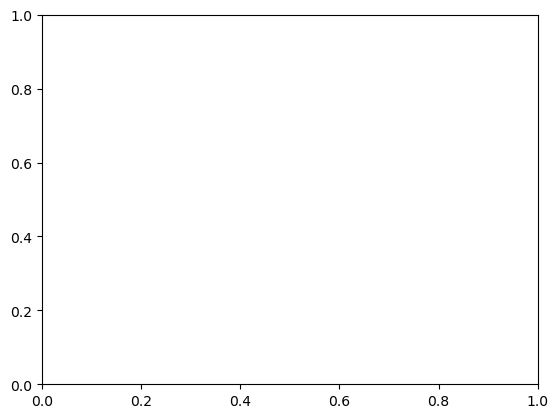

In [42]:
x = np.arange(len(labels))  # 标签位置
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots()

# 添加柱状图
rects1 = ax.bar(x - width/2, average_precision, width, label='Average Precision')
rects2 = ax.bar(x + width/2, roc_auc, width, label='ROC AUC')

# 添加一些文本标签，标题和轴标签
ax.set_ylabel('Scores')
ax.set_title('Scores by group and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 添加每个柱子的数值标签
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

In [12]:
fig.tight_layout()
plt.show()